In [1]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./car_fuel_efficiency.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
len(df)

9704

In [7]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [8]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[cols]

In [9]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

In [10]:
for col in cols:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print(df[col].dtype)
    print()

engine_displacement
[170 130 220 210 190]
36
int64

horsepower
[159.  97.  78.  nan 140.]
192
float64

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704
float64

model_year
[2003 2007 2018 2009 2008]
24
int64

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704
float64



In [11]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [12]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

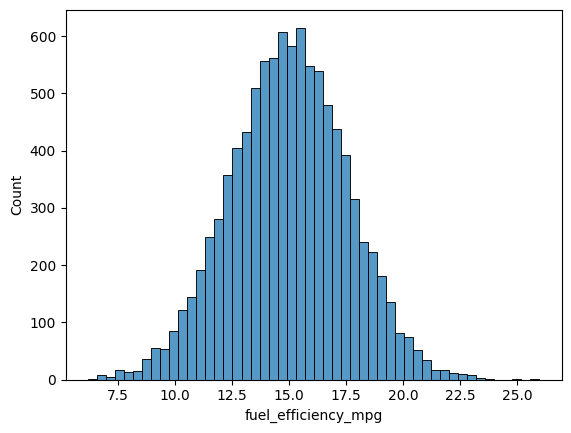

In [14]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

## It looks like it does not have a Long Tail distribution. Looks like a normal distribution.

## Question 1

In [15]:
# Based on my EDA, the column with missing values is "horsepower"
# df.isnull().sum() is required for this.

## Question 2

In [16]:
# Based on my EDA, the median is 149.657292
# df.horsepower.mean()

## Prepare and split the dataset

In [17]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [18]:
print(n_val, n_test, n_train, n_val+n_test+n_train)

1940 1940 5824 9704


In [19]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [20]:
df_shuffled.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [21]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Question 3

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [23]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse), 2)

In [24]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

### Option a) Filling with zeros

In [25]:
def prepare_X_zeros(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [26]:
X_train = prepare_X_zeros(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [27]:
y_pred = w_0 + X_train.dot(w)

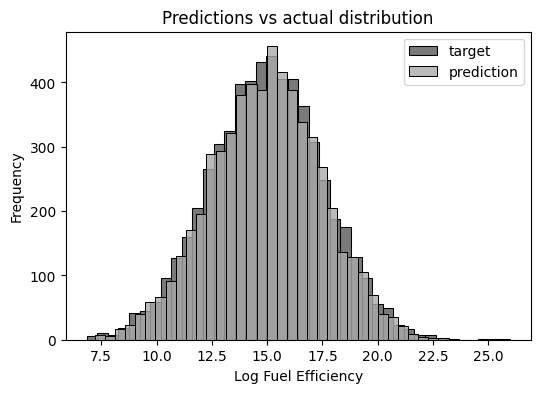

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log Fuel Efficiency')
plt.title('Predictions vs actual distribution')

plt.show()

In [29]:
# Error Calculation (Root Mean Squared Error)
rmse(y_train, y_pred)

np.float64(0.52)

In [30]:
X_val = prepare_X_zeros(df_val)
y_pred = w_0 + X_val.dot(w)

In [31]:
# Error Calculation (Root Mean Squared Error)
rmse(y_val, y_pred)

np.float64(0.52)

### Option b) Filling with mean

In [32]:
def prepare_X_mean(df):
    df_num = df[base]
    for col in base:
        df_num.fillna({col: df_num[col].mean()}, inplace=True)
    X = df_num.values
    return X

In [33]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [34]:
y_pred = w_0 + X_train.dot(w)

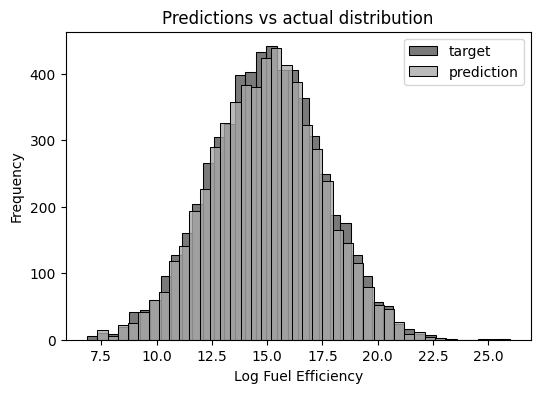

In [35]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log Fuel Efficiency')
plt.title('Predictions vs actual distribution')

plt.show()

In [36]:
# Error Calculation (Root Mean Squared Error)
rmse(y_train, y_pred)

np.float64(0.46)

In [37]:
X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)

In [38]:
# Error Calculation (Root Mean Squared Error)
rmse(y_val, y_pred)

np.float64(0.46)

In [39]:
# They are close as we expect to be.

In [40]:
# Although we get good results with filling zeros and mean, filling with Mean where the values are null gets better results (smaller RMSE)

## Question 4

In [41]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [42]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

X_train = prepare_X_zeros(df_train)
X_val = prepare_X_zeros(df_val)

for r in r_list:
    print("Reg value:", r)
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    
    y_pred = w_0 + X_train.dot(w)
    print("RMSE train data:", rmse(y_train, y_pred))

    y_pred = w_0 + X_val.dot(w)
    print("RMSE validation data:", rmse(y_val, y_pred))
    
    print()

Reg value: 0
RMSE train data: 0.52
RMSE validation data: 0.52

Reg value: 0.01
RMSE train data: 0.52
RMSE validation data: 0.52

Reg value: 0.1
RMSE train data: 0.52
RMSE validation data: 0.52

Reg value: 1
RMSE train data: 0.53
RMSE validation data: 0.52

Reg value: 5
RMSE train data: 0.53
RMSE validation data: 0.52

Reg value: 10
RMSE train data: 0.53
RMSE validation data: 0.52

Reg value: 100
RMSE train data: 0.53
RMSE validation data: 0.52



## Question 5

In [43]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [44]:
rmse_results = []

for s in seed_list:
    print("Seed number:", s)

    # Shuffle dataset
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    # 60-20-20
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # Targets
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    # Removing the target column from the features
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    # Training the model
    X_train = prepare_X_zeros(df_train)
    X_val = prepare_X_zeros(df_val)
    w_0, w = train_linear_regression(X_train, y_train)

    # Predicting and evaluating the errors
    # Predict on Training data
    y_pred = w_0 + X_train.dot(w)
    err = rmse(y_train, y_pred)
    print("RMSE train data:", err)
    # Predict on Validation data
    y_pred = w_0 + X_val.dot(w)
    err_val = rmse(y_val, y_pred)
    print("RMSE validation data:", err_val)

    rmse_results.append(err_val)
    
    print()

Seed number: 0
RMSE train data: 0.52
RMSE validation data: 0.52

Seed number: 1
RMSE train data: 0.51
RMSE validation data: 0.52

Seed number: 2
RMSE train data: 0.52
RMSE validation data: 0.52

Seed number: 3
RMSE train data: 0.52
RMSE validation data: 0.52

Seed number: 4
RMSE train data: 0.52
RMSE validation data: 0.51

Seed number: 5
RMSE train data: 0.52
RMSE validation data: 0.53

Seed number: 6
RMSE train data: 0.51
RMSE validation data: 0.53

Seed number: 7
RMSE train data: 0.52
RMSE validation data: 0.51

Seed number: 8
RMSE train data: 0.52
RMSE validation data: 0.51

Seed number: 9
RMSE train data: 0.52
RMSE validation data: 0.51



In [45]:
round(np.std(rmse_results), 3)

np.float64(0.007)

In [46]:
# Answer is 0.007 ~ 0.006 (closest)
# The model is stable

## Question 6

In [48]:
# Shuffle dataset
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

# 80-20 (combined Train and Val data)
df_train = df_shuffled.iloc[:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Targets
y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Removing the target column from the features
del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Training the model
X_train = prepare_X_zeros(df_train)
X_test = prepare_X_zeros(df_test)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

# Predicting and evaluating the errors
# Predict on (Train + Val) data
y_pred = w_0 + X_train.dot(w)
err = rmse(y_train, y_pred)
print("RMSE train data:", err)
# Predict on Test data
y_pred = w_0 + X_test.dot(w)
err_test = rmse(y_test, y_pred)
print("RMSE validation data:", err_test)


RMSE train data: 0.52
RMSE validation data: 0.52


In [ ]:
# Answer is 0.52 ~ 0.515